<a href="https://colab.research.google.com/github/Arifulhaque-02128/ML_Projects/blob/main/medical_specialist_classification_using_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [205]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [206]:
df = pd.read_csv("/content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattion/Specialist Classification.csv")


In [207]:
df.head()

,Patient ID,Gender,Problem,Specialist
0,NaN,NaN,NaN,NaN
1,1.0,মহিলা,আমার তিন দিন যাবত অনেক মাথা ব্যথা,Medicine
2,2.0,পুরুষ,আমার প্রায় এক সপ্তাহ ধরে রোদে গেলেই মাথা ধরে য...,Medicine
3,3.0,মহিলা,আমার বোনের কয়েকদিন ধরে চোখ আর মাথা ব্যথা,Medicine
4,4.0,মহিলা,আমার মায়ের কপালের দুই দিকে অনেক ব্যথা করে আর ন...,Medicine


In [208]:
df.isnull().sum()

Patient ID    1
Gender        1
Problem       1
Specialist    1
dtype: int64

In [209]:
new_df = df.dropna()

In [210]:
new_df.isnull().sum()

Patient ID    0
Gender        0
Problem       0
Specialist    0
dtype: int64

In [211]:
new_df.head()

,Patient ID,Gender,Problem,Specialist
1,1.0,মহিলা,আমার তিন দিন যাবত অনেক মাথা ব্যথা,Medicine
2,2.0,পুরুষ,আমার প্রায় এক সপ্তাহ ধরে রোদে গেলেই মাথা ধরে য...,Medicine
3,3.0,মহিলা,আমার বোনের কয়েকদিন ধরে চোখ আর মাথা ব্যথা,Medicine
4,4.0,মহিলা,আমার মায়ের কপালের দুই দিকে অনেক ব্যথা করে আর ন...,Medicine
5,5.0,পুরুষ,আমার অনেক মাথা ব্যথা করে,Medicine


In [212]:
new_df["Specialist"].value_counts()

Specialist
Medicine           278
Ophthalmologist     71
Gynecologist        59
Surgery             58
Orthopedic          48
Cardiologist        42
Skin                38
Dentist             37
ENT                 27
Name: count, dtype: int64

In [213]:
new_df["Gender"].value_counts()

Gender
মহিলা    370
পুরুষ    288
Name: count, dtype: int64

In [214]:
sns.set(style="ticks", context="talk", font_scale=1.5)
plt.style.use("dark_background")

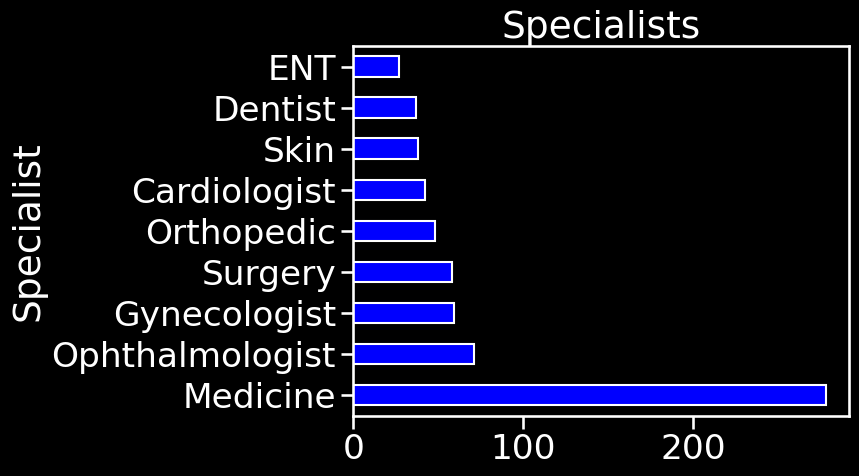

In [215]:
new_df["Specialist"].value_counts().plot.barh(color='blue', title='Specialists',);

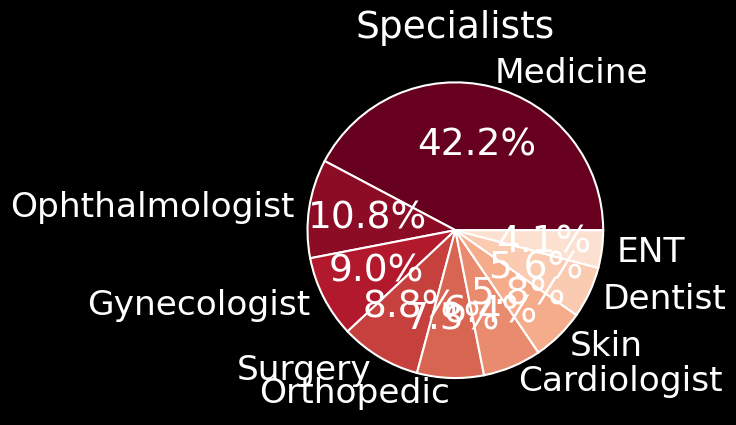

In [216]:
color = plt.cm.RdBu(np.linspace(0,1,20))
new_df["Specialist"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="Gender",colors=color,autopct="%0.1f%%")
plt.title("Specialists")
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Bengali natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2489 (\N{BENGALI LETTER HA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
/us

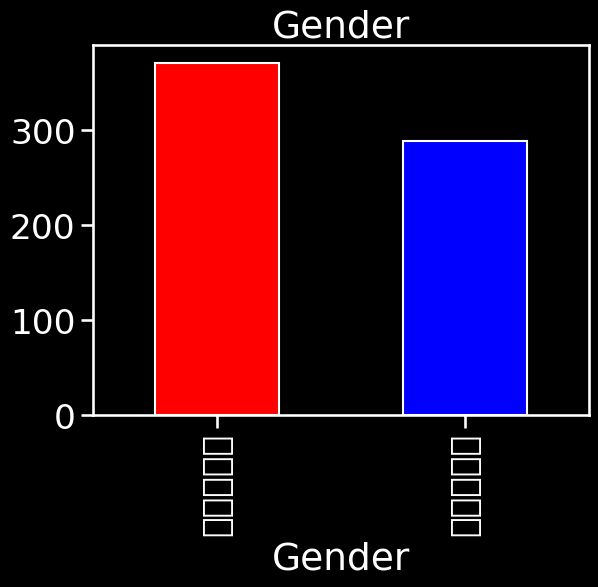

In [217]:
new_df["Gender"].value_counts().nlargest(4).plot.bar(color=['red','blue'], title='Gender');

In [218]:
den = new_df[(new_df['Specialist']=='Dentist')].reset_index(drop=True)
den.head()

,Patient ID,Gender,Problem,Specialist
0,20.0,পুরুষ,আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে ...,Dentist
1,21.0,পুরুষ,আমার দাঁত ভেঙ্গে যাচ্ছে,Dentist
2,22.0,মহিলা,আমার মাড়ি অনেক ব্যথা আর ব্রাশ করার সময় রক্ত পর...,Dentist
3,23.0,মহিলা,আমার দাঁতে কালো দাগ হচ্ছে কোনোভাবেই দাগ যাচ্ছে...,Dentist
4,24.0,পুরুষ,আমি দাঁতে জোর পাচ্ছি না।,Dentist


In [219]:
den["Gender"].value_counts()

Gender
পুরুষ    21
মহিলা    16
Name: count, dtype: int64

In [220]:
surg = new_df[(new_df['Specialist']=='Surgery')].reset_index(drop=True)
surg.head()

,Patient ID,Gender,Problem,Specialist
0,11.0,মহিলা,আমার মুখে অনেক বড় ফোঁড়ার মত উঠে আর লাল হয়ে থাক...,Surgery
1,96.0,মহিলা,আমার স্তনে প্রচন্ড ব্যথা করে। প্রায় এক মাস ধরে...,Surgery
2,97.0,মহিলা,আমার নিপল অনেক চুল্কায় এবং সাদা ময়লার মত বের হয়।,Surgery
3,98.0,মহিলা,নিপল অনেক ব্যথা করে আর ফুলে গিয়েছে আর চাপ দিলে...,Surgery
4,99.0,মহিলা,আমার নিপলে লাল গোটার মত বের হয়েছে এবং লাল হয়ে ...,Surgery


In [221]:
surg["Gender"].value_counts()

Gender
মহিলা    44
পুরুষ    14
Name: count, dtype: int64

In [222]:
ski = new_df[(new_df['Specialist']=='Skin')].reset_index(drop=True)
ski.head()

,Patient ID,Gender,Problem,Specialist
0,9.0,পুরুষ,আমার কপালে গোটার মত বের হয়েছে,Skin
1,10.0,পুরুষ,আমার অনেক ব্রণ হয় মুখে। আর অনেক ব্যথা করে।,Skin
2,12.0,পুরুষ,আমার মুখে গোটা উঠে মুখে কালো দাগ পরে যাচ্ছে।,Skin
3,13.0,মহিলা,আমার নাকে আর থুতনিতে সাদা বিচির মত উঠে আর মুখ ...,Skin
4,55.0,মহিলা,আমি ধুলায় গেলে আমার স্কিন অনেক চুল্কায় আর ফুলে...,Skin


In [223]:
ski["Gender"].value_counts()

Gender
মহিলা    23
পুরুষ    15
Name: count, dtype: int64

In [224]:
import re,nltk,json

In [225]:
data1 = pd.read_excel('/content/gdrive/MyDrive/NLP/Project/stopwords_bangla.xlsx')
stopwords = data1['words'].tolist()

### Cleaning Data

In [226]:
# # Cleaning Data [Remove unncessary symbols]
# def cleaning_data(problem):
#       problems = re.sub('[^\u0980-\u09FF]',' ',str(problem)) #removing unnecessary punctuation
#       return problems
# # Apply the function into the dataframe
# new_df['cleaned_problem'] = new_df['Problem'].apply(cleaning_data)



def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out



In [227]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stopwords]

    out=' '.join(stm)

    return str(out)

In [228]:
new_df['cleaned_problem'] = new_df['Problem'].apply(preprocessing)
new_df['cleaned_problem'] = new_df['cleaned_problem'].apply(stopwordRemoval)

# print some cleaned reviews from the dataset
sample_data = [20,50,100,200,300,350,400,450,500,600]
for i in sample_data:
  print('Original: ', new_df.Problem[i],'\nCleaned:',
           new_df.cleaned_problem[i],'\n','Category:-- ', new_df.Specialist[i],'\n')

Original:  আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে পারি না। অনেক অস্বস্তি লাগে। 
Cleaned: দাঁত শিরশির ঠান্ডা গরম খেতে অস্বস্তি 
 Category:--  Dentist 

Original:  আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে। 
Cleaned: মাথা চোখে প্রেসার পরছে 
 Category:--  Ophthalmologist 

Original:  আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না। 
Cleaned: স্তনের নিপল দুধের সাদা রস প্রেগন্যান্ট 
 Category:--  Surgery 

Original:  আমার পায়ে পানি আসছে। ঠিকমত হাঁটতে পারছি না 
Cleaned: পায়ে পানি আসছে ঠিকমত হাঁটতে পারছি 
 Category:--  Medicine 

Original:  আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে। 
Cleaned: মাথা চোখে প্রেসার পরছে 
 Category:--  Ophthalmologist 

Original:  আমার ছেলের রাতের বেলা জ্বর আসে। 
Cleaned: ছেলের রাতের বেলা জ্বর 
 Category:--  Medicine 

Original:  আমার পায়ের আঙ্গুল ফুলে আছে আর প্রচুর ব্যথা করছে। 
Cleaned: পায়ের আঙ্গুল ফুলে প্রচুর 
 Category:--  Medicine 

Original:  আমার 

<ipython-input-228-03ea5795bc4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_problem'] = new_df['Problem'].apply(preprocessing)
<ipython-input-228-03ea5795bc4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_problem'] = new_df['cleaned_problem'].apply(stopwordRemoval)


### Dataset Analysis

In [229]:
def data_summary(dataset):

    """
    This function will print the summary of the problems and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(new_df.cleaned_problem) for word in t.strip().split()]
    class_label= [k for k,v in new_df.Specialist.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(new_df[new_df.Specialist==label].cleaned_problem) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(new_df[new_df.Specialist==label].cleaned_problem)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(new_df[new_df.Specialist==label].cleaned_problem))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(new_df)


Class Name :  Medicine
Number of Documents:278
Number of Words:1321
Number of Unique Words:392
Most Frequent Words:

মাথা	39
ঠিকমত	36
ঘুম	33
বমি	28
জ্বর	23
শরীর	20
ফুলে	17
পেট	16
মায়ের	15
পানি	14

Class Name :  Ophthalmologist
Number of Documents:71
Number of Words:325
Number of Unique Words:111
Most Frequent Words:

চোখ	36
চোখে	16
পানি	11
ঠিকমত	11
দেখি	9
চোখের	9
ঝাপ্সা	7
চুল্কায়	7
অস্বস্তি	7
মেয়ের	6

Class Name :  Gynecologist
Number of Documents:59
Number of Words:339
Number of Unique Words:130
Most Frequent Words:

পিরিয়ড	21
পিরিয়ডের	14
সাদা	13
সময়	12
পেট	11
মেয়ের	11
আম্মুর	9
স্তনে	8
রক্ত	7
মায়ের	7

Class Name :  Surgery
Number of Documents:58
Number of Words:293
Number of Unique Words:91
Most Frequent Words:

ফুলে	16
আস্তে	12
বড়	11
স্তন	11
মেয়ের	11
পুঁজ	9
স্তনে	8
নিপল	8
মায়ের	8
মুখে	7

Class Name :  Orthopedic
Number of Documents:48
Number of Words:229
Number of Unique Words:93
Most Frequent Words:

হাত	10
পায়ের	9
মাজা	9
হাঁটুতে	8
পায়ে	8
নাড়াতে	7
প্রচন্ড	7
পা	6
মায়ের	5
সময়	5

Clas

### Problem Visualization

<ipython-input-230-04e7bfc8576b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(class_names, rotation=45);


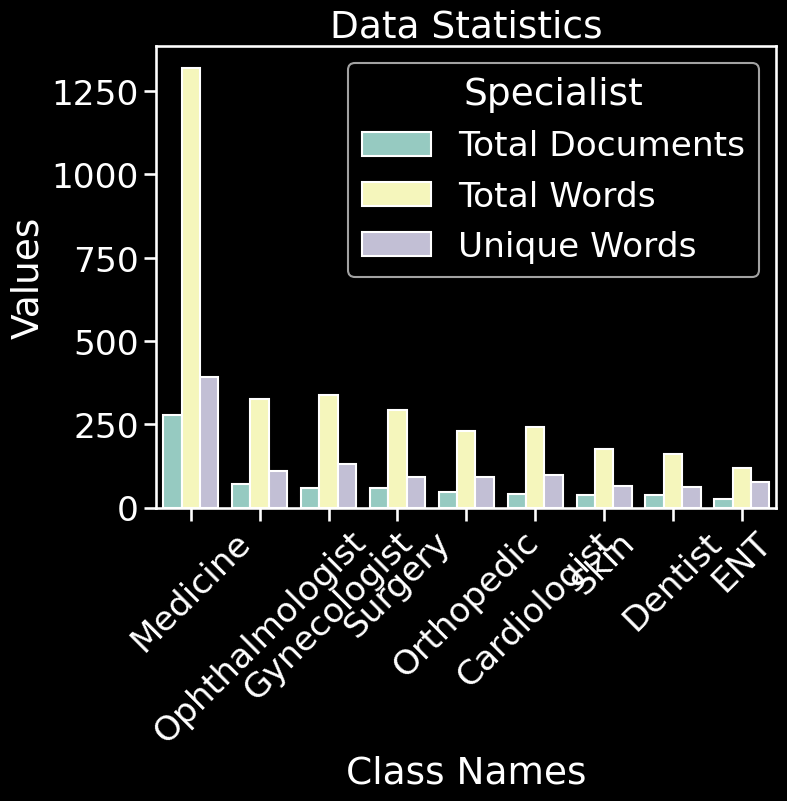

In [230]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Specialist", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Specialist')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

### Problem Text Length Visualization

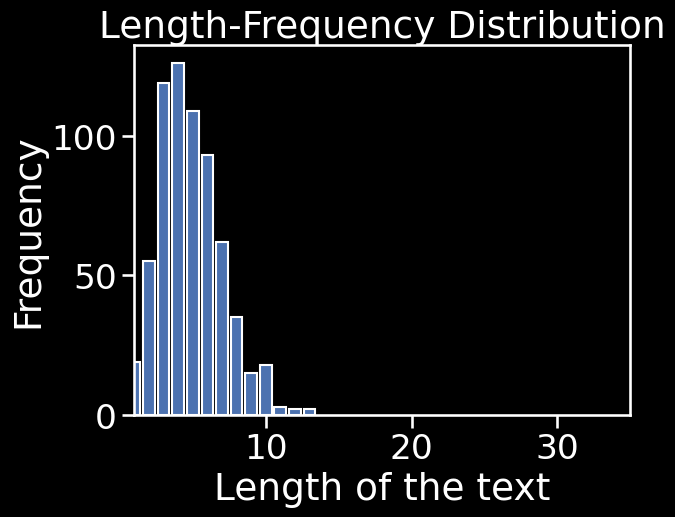

Maximum Length of a text: 13
Minimum Length of a text: 1
Average Length of a text: 5.0


In [231]:
# Calculate the Review of each of the Review
new_df['textLength'] = new_df.cleaned_problem.apply(lambda x:len(x.split()))
frequency = dict()
for i in new_df.textLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 35)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the text')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a text: {max(new_df.textLength)}")
print(f"Minimum Length of a text: {min(new_df.textLength)}")
print(f"Average Length of a text: {round(np.mean(new_df.textLength),0)}")

In [232]:
# segregating dataframe for analyzing individual problem
df_med = new_df[new_df['Specialist'] == 'Medicine']
df_ophtha = new_df[new_df['Specialist'] == 'Ophthalmologist']
df_gyne = new_df[new_df['Specialist'] == 'Gynecologist']
df_surg = new_df[new_df['Specialist'] == 'Surgery']

df_ortho = new_df[new_df['Specialist'] == 'Orthopedic']
df_cardio = new_df[new_df['Specialist'] == 'Cardiologist']
df_skin = new_df[new_df['Specialist'] == 'Skin']
df_dent = new_df[new_df['Specialist'] == 'Dentist']
df_ent = new_df[new_df['Specialist'] == 'ENT']


In [233]:
!pip install wordcloud
!pip install bnlp_toolkit

In [234]:
!pip install python-bidi
from bidi.algorithm import get_display


Text(0.5, 1.0, 'Word cloud for Medicine')

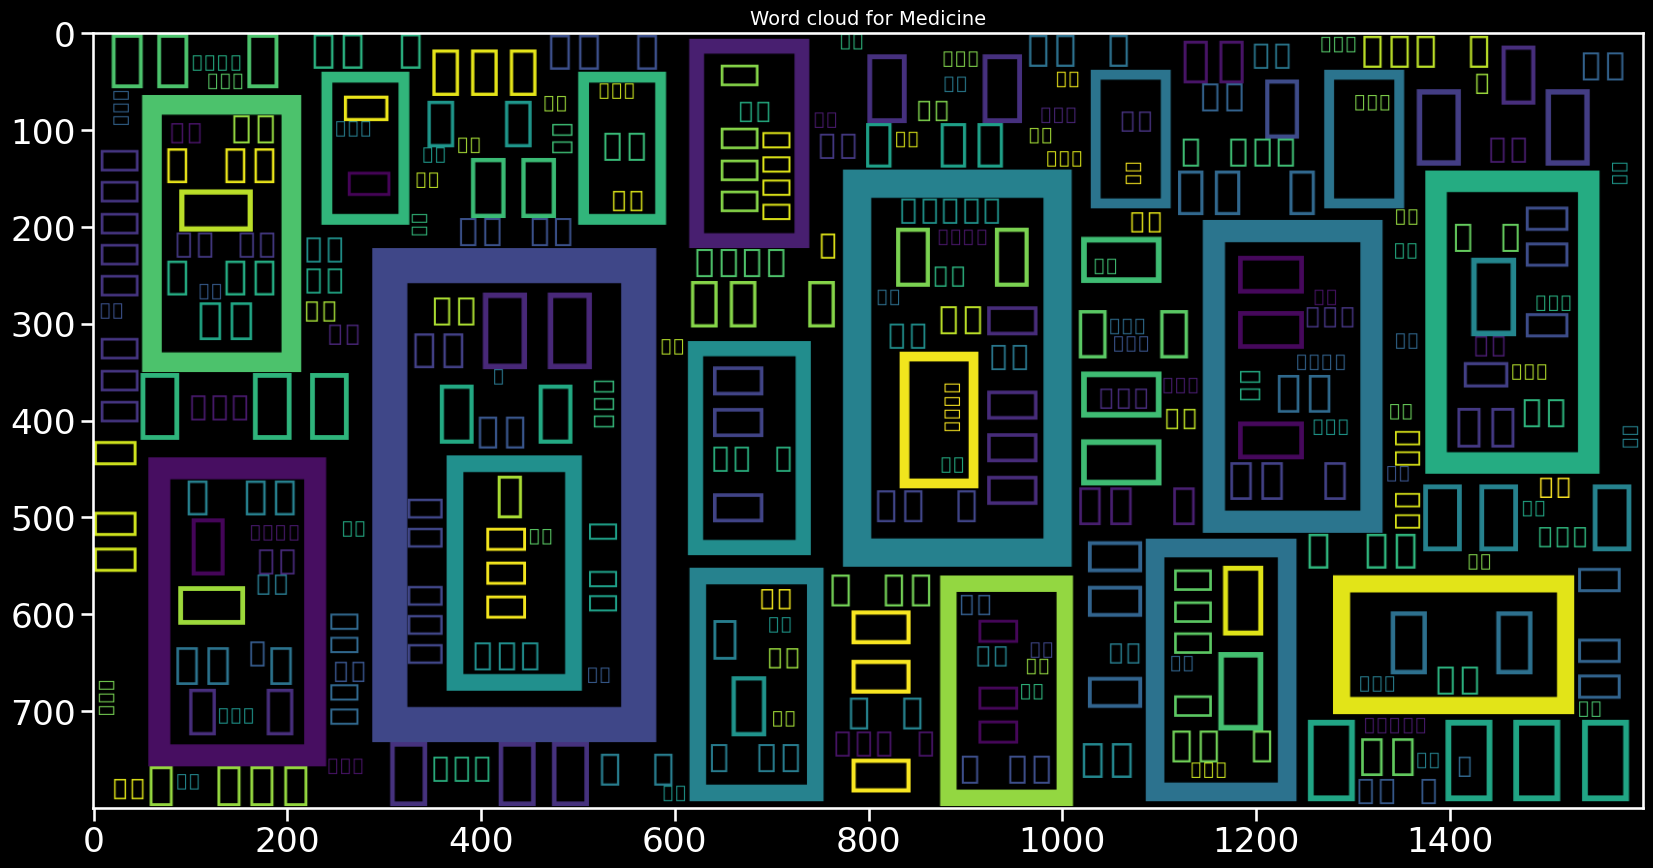

In [235]:
from wordcloud import WordCloud


plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(' '.join(df_med.cleaned_problem))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word cloud for Medicine', fontsize = 14)

In [253]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

In [254]:
def label_encoding(specialist,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        specialist: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(specialist)
    encoded_labels = le.transform(specialist)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->", le.classes_)
        # print("\n\t\t\t===== Labels =====",labels)
        # for i in sample_data:
        #     print(specialist[i],' ', encoded_labels[i],'\n')

    return labels, le

In [255]:
def dataset_split(feature_space,specialist):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature_space: calcuated feature vector (sparse matrix)
        specialist: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,specialist,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [256]:
new_df.cleaned_problem = new_df.cleaned_problem.apply(lambda x:x.replace('\n',' '))

### Model Building Using Machine Learning Feature Extraction Using TF-IDF

In [257]:
# Unigram Tf-idf value calculation

def calc_gram_tfidf(problems, gram):

  """
  This function will return the tf-idf value of the respective gram features .

  Args:
      problems: a list of cleaned problems

  Returns:
      tfidf: a instance of TfidfVectorizer
      X : Unigram Feature Vector (sparse matrix)
  """
  tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
  X = tfidf.fit_transform(problems)

  return tfidf, X



In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [259]:
#########  Classifiers Defination  #########
def ml_models_defination():
    """
    This function consists the models defination for All gram Features

    Retuns:
        ml_models: list of models
        model_names: list of model_names

    """


    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss='log', random_state=0)

    model_names = ['Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM', 'SGD Classifier']

    # Create list of models
    ml_models = [dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model, sgd_model]
    #ml_models = [lr_model]
    return ml_models, model_names

In [260]:
####### Model Evaluation Function ############

def model_performace(model,X_train,X_test,y_train,y_test, label_encoder, vectorizer):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.

    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)

    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y, average='micro'),4)*100 # try for ---> average='macro'
    my_dict['Recall'] = round(recall_score(y_test, pred_y, average='micro'),4)*100 # try for ---> average='macro'
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average='micro'),4)*100 # try for ---> average='macro'

    # Display sample predictions
    # sample_indices = [0, 1, 2, 3, 4]  # indices of samples to display
    # print("\nSample predictions:")
    # for idx in sample_indices:
    #     actual_class_name = label_encoder.inverse_transform([y_test[idx]])[0]
    #     predicted_class_name = label_encoder.inverse_transform([pred_y[idx]])[0]
    #     input_text_vector = X_test[idx]
    #     input_text = vectorizer.inverse_transform(input_text_vector)  # Convert vectorized text back to original text
    #     print(f"Sample {idx}: Problem = {input_text}  \nPredicted={predicted_class_name}, Actual={actual_class_name}")

    return my_dict

In [261]:
#### Model Performane into Dataframe #####
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.

    Args:
        performance_dict: a dictionary of all the parameters for each models

    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['DT','RF','MNB','KNN','Linear SVM','RBF SVM', 'SGD']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

### Model Training

In [262]:
## performance of the model for each gram feature
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
acc = {}
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(new_df.cleaned_problem,gram)
    labels, label_encoder = label_encoding(new_df.Specialist, False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test, label_encoder, tfidf) for j,model in enumerate(ml_models)}
    acc = accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 641

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 658 
	Training		 526 
	Test			 132


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 2257

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 658 
	Training		 526 
	Test			 132


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 3745

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 658 
	Training		 526 
	Test			 132


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [263]:
acc

{'Decision Tree': {'Accuracy': 70.45,
  'Precision': 70.45,
  'Recall': 70.45,
  'F1 Score': 70.45},
 'Random Forest': {'Accuracy': 71.97,
  'Precision': 71.97,
  'Recall': 71.97,
  'F1 Score': 71.97},
 'Naive Bayes': {'Accuracy': 72.72999999999999,
  'Precision': 72.72999999999999,
  'Recall': 72.72999999999999,
  'F1 Score': 72.72999999999999},
 'KNN': {'Accuracy': 73.48,
  'Precision': 73.48,
  'Recall': 73.48,
  'F1 Score': 73.48},
 'Linear SVM': {'Accuracy': 44.7,
  'Precision': 44.7,
  'Recall': 44.7,
  'F1 Score': 44.7},
 'Kernel SVM': {'Accuracy': 46.97,
  'Precision': 46.97,
  'Recall': 46.97,
  'F1 Score': 46.97},
 'SGD Classifier': {'Accuracy': 69.69999999999999,
  'Precision': 69.69999999999999,
  'Recall': 69.69999999999999,
  'F1 Score': 69.69999999999999}}

### Performance Table

In [264]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")



========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     70.45      70.45   70.45     70.45          DT
1     71.97      71.97   71.97     71.97          RF
2     72.73      72.73   72.73     72.73         MNB
3     73.48      73.48   73.48     73.48         KNN
4     44.70      44.70   44.70     44.70  Linear SVM
5     46.97      46.97   46.97     46.97     RBF SVM
6     69.70      69.70   69.70     69.70         SGD

========In case of Unigram feature:========

Highest Accuracy achieved by KNN at = 73.48
Highest F1-Score achieved by KNN at = 73.48
Highest Precision Score achieved by KNN at = 73.48
Highest Recall Score achieved by KNN at = 73.48

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     70.45      70.45   70.45     70.45          DT
1     71.97      71.97   71.97     71.97          RF
2     72.73      72.73   72.73     72.73         MNB
3     73.48   

In [265]:
# Function to manually predict with sample text
def predict_sample_text(model, sample_text, vectorizer, label_encoder):
    sample_vector = vectorizer.transform([sample_text])
    predicted_label = model.predict(sample_vector)
    predicted_class = label_encoder.inverse_transform(predicted_label)[0]
    return predicted_class

In [273]:
# manual prediction
sample_text = ["আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে পারি না। অনেক অস্বস্তি লাগে।", "আমার নাতনির ঠিকমত পিরিয়ড হচ্ছে না। আর অনেক সাদা স্রাব বের হয়", "আমার দূরের জিনিস দেখতে অনেক কষ্ট হয় আর তখন মাথা ব্যথা করে", "আমার পায়ে পানি আসছে। ঠিকমত হাঁটতে পারছি না", "আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না।", "আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে।"]
sample_output = ['Dentist', 'Gynecologist', 'Ophthalmologist', 'Medicine', 'Surgery', 'Ophthalmologist' ]
dt_model = ml_models[0]

for i, text in enumerate(sample_text) :
  cleaned_sample_txt = preprocessing(text)
  cleaned_sample = stopwordRemoval(cleaned_sample_txt)
  predicted_class = predict_sample_text(dt_model, cleaned_sample, tfidf, label_encoder)
  print(f"Problem :  '{text}' \nPredicted Class : '{predicted_class}'\nActual Class : '{sample_output[i]}'\n")

Problem :  'আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে পারি না। অনেক অস্বস্তি লাগে।' 
Predicted Class : 'Dentist'
Actual Class : 'Dentist'

Problem :  'আমার নাতনির ঠিকমত পিরিয়ড হচ্ছে না। আর অনেক সাদা স্রাব বের হয়' 
Predicted Class : 'Gynecologist'
Actual Class : 'Gynecologist'

Problem :  'আমার দূরের জিনিস দেখতে অনেক কষ্ট হয় আর তখন মাথা ব্যথা করে' 
Predicted Class : 'Medicine'
Actual Class : 'Ophthalmologist'

Problem :  'আমার পায়ে পানি আসছে। ঠিকমত হাঁটতে পারছি না' 
Predicted Class : 'Medicine'
Actual Class : 'Medicine'

Problem :  'আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না।' 
Predicted Class : 'Surgery'
Actual Class : 'Surgery'

Problem :  'আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে।' 
Predicted Class : 'Ophthalmologist'
Actual Class : 'Ophthalmologist'

